<a href="https://colab.research.google.com/github/benjamin-du/intermediate-python-topics/blob/main/Working_with_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with sets

# Resources

# Bonus: venn diagrams

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

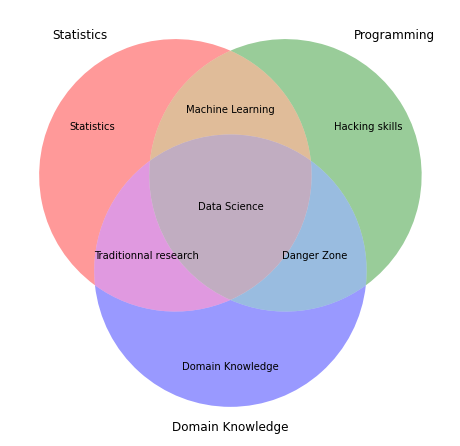

In [ ]:
plt.figure(figsize=(8,8))
v = venn3(subsets=(10,10,10,10,10,10,10),
      set_labels=("Statistics", "Programming", "Domain Knowledge"))

v.get_label_by_id('100').set_text('Statistics')
v.get_label_by_id('010').set_text('Hacking skills')
v.get_label_by_id('001').set_text('Domain Knowledge')
v.get_label_by_id('111').set_text('Data Science')
v.get_label_by_id('110').set_text('Machine Learning')
v.get_label_by_id('011').set_text('Danger Zone')
v.get_label_by_id('101').set_text('Traditionnal research')
plt.show()

In [ ]:
?venn3